In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [3]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [12]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [15]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [16]:
X = df.drop(columns=['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
X_train.shape

(8000, 11)

In [18]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [20]:
#scaled in values
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential()

#model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='relu',input_dim=11))# Finetune
model.add(Dense(11,activation='sigmoid'))#Hidden Layer
model.add(Dense(1,activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 5ms/step - loss: 0.5207 - accuracy: 0.7958 - val_loss: 0.5123 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5190 - accuracy: 0.7958 - val_loss: 0.5220 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5149 - accuracy: 0.7958 - val_loss: 0.5129 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 4ms/step - loss: 0.5091 - accuracy: 0.7958 - val_loss: 0.5138 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5107 - accuracy: 0.7958 - val_loss: 0.5181 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5145 - accuracy: 0.7958 - val_loss: 0.5132 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5118 - accuracy: 0.7958 - val_loss: 0.5108 - val_accuracy: 0.7969

In [26]:
model.layers[1].get_weights()

[array([[-0.3882032 ,  0.33247632,  0.3765771 ,  0.4253233 , -0.52376515,
         -0.16248691,  0.48994273,  0.09029466, -0.16921955,  0.41867337,
          0.20039704],
        [ 0.17255388,  0.40106714, -0.0086534 ,  0.4815982 ,  0.16717188,
         -0.51180214, -0.2552269 ,  0.51540667, -0.17183816, -0.3054241 ,
         -0.3350757 ],
        [ 0.11394662, -0.3808844 ,  0.23205286, -0.34260294, -0.09278351,
         -0.22731376,  0.25324446, -0.05506831, -0.18117467,  0.22522706,
          0.4387247 ],
        [ 0.3447768 ,  0.05199081,  0.33162773,  0.40225124, -0.06104417,
          0.43165278,  0.479392  , -0.19637027,  0.39168233,  0.26414925,
          0.04990661],
        [ 0.20661753, -0.12103134, -0.1146583 ,  0.16275603, -0.41544244,
         -0.38887662,  0.13343245, -0.15855455, -0.118799  , -0.2519076 ,
          0.36755824],
        [-0.49191514,  0.3536582 ,  0.42245162, -0.14975345, -0.367364  ,
         -0.4212136 ,  0.36603636,  0.08898854, -0.0553965 , -0.0142116

In [27]:
model.layers[0].get_weights()

[array([[ 3.98836762e-01,  6.53012246e-02, -1.87258244e-01,
         -1.39585316e-01, -1.36053562e-03, -2.11318433e-01,
          1.11863993e-01, -1.45172387e-01, -4.74583954e-01,
         -1.03573978e-01,  2.58007258e-01],
        [ 4.00318615e-02,  3.57835650e-01,  4.58503246e-01,
          2.77834147e-01, -1.80342197e-01, -6.84789121e-02,
         -3.84850621e-01, -4.86079544e-01,  2.26837844e-01,
          2.69228578e-01, -5.47542691e-01],
        [-4.64612395e-01,  3.92551690e-01, -2.01300472e-01,
          5.11587448e-02,  3.10489953e-01,  4.35261965e-01,
         -3.56559336e-01,  9.29846242e-02,  2.74119765e-01,
         -3.26032400e-01,  8.12851936e-02],
        [ 3.01422447e-01,  3.55331004e-01, -3.05336714e-01,
          4.77508724e-01, -1.02476627e-01, -1.61777645e-01,
          1.42072186e-01,  2.86286265e-01,  2.68791437e-01,
          4.69945699e-01,  8.46923366e-02],
        [-1.55768190e-02, -4.02174950e-01,  3.73155832e-01,
         -5.11970632e-02,  1.05472684e-01, -

In [41]:
y_pred = model.predict(X_test)

In [42]:
y_pred

array([[0.23004231],
       [0.23004231],
       [0.23004231],
       ...,
       [0.23004231],
       [0.23004231],
       [0.23004231]], dtype=float32)

In [43]:
y_pred = y_pred.argmax(axis=-1)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

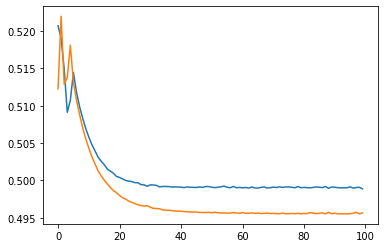

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

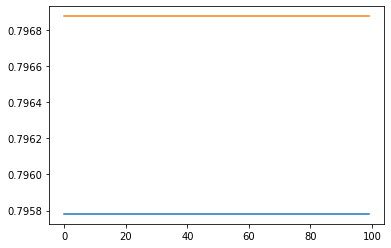

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])